Antes importaremos estas librerías, la última linea es para cambiar un directorio más arriba y encontrar a app.utils:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
sys.path.append(os.path.abspath(".."))

Primero, creamos los datos limpios y procesados.

In [6]:
from app.utils import cargar_y_preprocesar_dataset
import pandas as pd
import os

# Base del proyecto (donde está este script)
BASE_DIR = os.getcwd()
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Rutas relativas desde la raíz del proyecto
ruta_raw = os.path.join(BASE_DIR, "data", "raw", "Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
ruta_clean = os.path.join(BASE_DIR, "data", "processed", "clean_dataset.csv")
ruta_maliciosos = os.path.join(BASE_DIR, "data", "processed", "malicious_samples.csv")

# Cargar y preprocesar el dataset
df = cargar_y_preprocesar_dataset(ruta_raw)
df.to_csv(ruta_clean, index=False)

# Cargar el dataset limpio
df = pd.read_csv(ruta_clean)

# Filtrar solo tráfico malicioso (Label = 1)
malicious_df = df[df["Label"] == 1]

# Guardar como CSV para el simulador
malicious_df.drop("Label", axis=1).to_csv(ruta_maliciosos, index=False)

Este es un primer análisis básico para comprobar que funcionó nuestra limpieza.

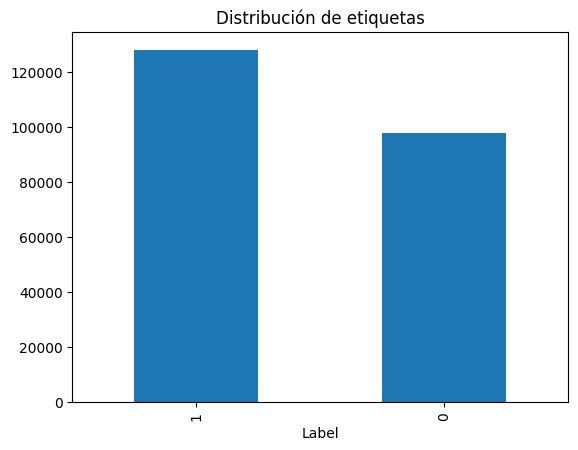

In [7]:
df["Label"].value_counts().plot(kind='bar', title="Distribución de etiquetas")
plt.show()

Perfecto, ahora creemos el clasificador pequeño y lo guardamos con joblib

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib
import pandas as pd
import numpy as np
import os

# Obtener el directorio raíz del proyecto (subiendo desde notebooks/)
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Definir rutas absolutas basadas en la raíz del proyecto
ruta_dataset = os.path.join(BASE_DIR, "data", "processed", "clean_dataset.csv")
ruta_modelo = os.path.join(BASE_DIR, "models", "modelo_clasificador_trafico_red.pkl")

# Verifica si el archivo existe antes de continuar
if not os.path.exists(ruta_dataset):
    raise FileNotFoundError(f"No se encontró el dataset: {ruta_dataset}")

# Cargar dataset limpio
df = pd.read_csv(ruta_dataset)

# Separar variables y etiquetas
X = df.drop("Label", axis=1)
y = df["Label"]

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar modelo
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

# Evaluar modelo
y_pred = modelo.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Guardar modelo entrenado
joblib.dump(modelo, ruta_modelo)

print(f"Modelo guardado correctamente en: {ruta_modelo}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19419
           1       1.00      1.00      1.00     25724

    accuracy                           1.00     45143
   macro avg       1.00      1.00      1.00     45143
weighted avg       1.00      1.00      1.00     45143

[[19419     0]
 [    4 25720]]
Modelo guardado correctamente en: c:\Users\danie\ProyectoPACD\models\modelo_clasificador_trafico_red.pkl
